In [32]:
import os
import pandas as pd
import numpy as np
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora
from datautils.utils import lazy_load_processed_data
from datautils.txt_corpus import TxtCorpus
import matplotlib.pyplot as plt

In [33]:
DATA_LOC = os.path.join('data', '2020-06-20')

#class TxtCorpus:
#    def __init__(self, data_loc):
#        self.data_loc = data_loc
#        self.dictionary = gensim.corpora.Dictionary(lazy_load_processed_data(data_loc))
#        #self.dictionary = gensim.corpora.Dictionary.load('lda.model.id2word')
#
#    def __iter__(self):
#        for tokens in lazy_load_processed_data(self.data_loc):
#            yield self.dictionary.doc2bow(tokens)
#
#    def get_dict(self):
#        return self.dictionary

In [34]:
lda_model = LdaMulticore.load(os.path.join('saved_models','lda.model'))

In [35]:
corpus = TxtCorpus(DATA_LOC)

Here we show different kinds of visualizations on the trained LDA model

<b>1. Show document wise, number of topics and which topic is dominant and percentage contribution</b>

In [36]:
def show_dominant_topic(lda_model, corpus):
    """
    TODO: add doc string
    """
    df = pd.DataFrame(index=range(50000), columns=['doc_id', 'dominant_topic', 'weight', 'topic_keywords'])
    for doc_id, topic_vector in enumerate(lda_model[corpus]):
        #print(topic_vector)
        num_topics = len(topic_vector)
        # sort based on topic weight
        topic_vector = sorted(topic_vector, key=lambda x: (x[1]), reverse=True)
        #print(topic_vector)
        dominant_topic, weight = topic_vector[0]
        #print(dominant_topic, weight)
        words_vector = lda_model.show_topic(dominant_topic)
        #print(words_vector)
        topic_keywords = ', '.join([word for word, _ in words_vector])
        df_row = [doc_id, dominant_topic, weight, topic_keywords]
        df.loc[doc_id] = df_row
        #print(doc_id)
    df.dropna(inplace=True)
    return df

In [37]:
df = show_dominant_topic(lda_model, corpus)
df

,doc_id,dominant_topic,weight,topic_keywords
0,0,0,0.912894,"patient, infection, study, respiratory, pneumo..."
1,1,12,0.762738,"cell, expression, study, il, response, effect,..."
2,2,10,0.43741,"protein, cov, virus, cell, bind, sars, structu..."
3,3,11,0.425117,"lung, cell, patient, pulmonary, tissue, respir..."
4,4,12,0.381466,"cell, expression, study, il, response, effect,..."
...,...,...,...,...
72214,72214,16,0.397957,"sample, virus, pcr, test, study, positive, det..."
72215,72215,4,0.534901,"patient, ct, case, study, image, disease, resu..."
72216,72216,7,0.669211,"patient, covid, study, health, case, care, dis..."
72217,72217,5,0.998787,"la, en, el, le, que, los, se, et, de, une"


<b>2. Freqency Distribution of word counts in documents</b>

72219


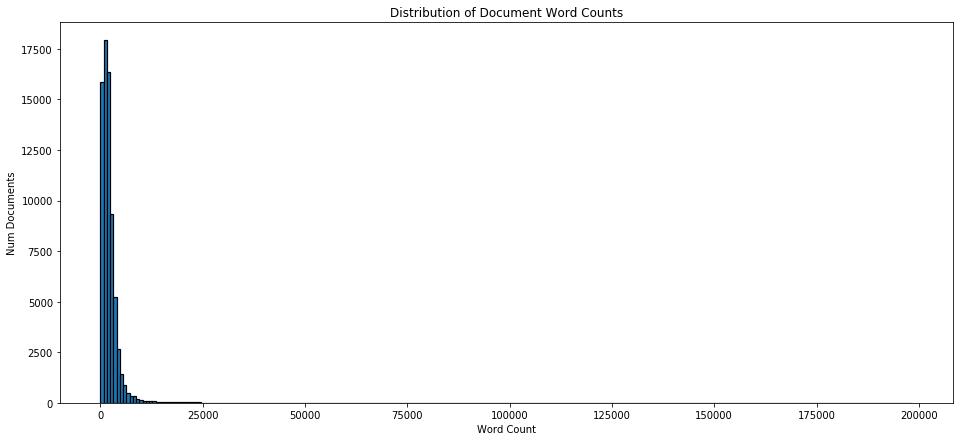

Mean:  2453.6794472368765
Median:  1682.0
Standard Deviation:  5418.437742922199


In [38]:
docs = lazy_load_processed_data(DATA_LOC)
num_words_in_doc = [len(doc) for doc in docs]
print(len(num_words_in_doc))
plt.figure(figsize=(16,7))
plt.hist(num_words_in_doc, bins=250, edgecolor='black', linewidth=1.2)
plt.xlabel('Word Count')
plt.ylabel('Num Documents')
plt.title('Distribution of Document Word Counts')
plt.show()

#print Mean, Median and standard deviation of word counts
print("Mean: ", np.mean(num_words_in_doc))
print("Median: ", np.median(num_words_in_doc))
print("Standard Deviation: ", np.std(num_words_in_doc))

<b>3. Visualize key_words in each topic</b>

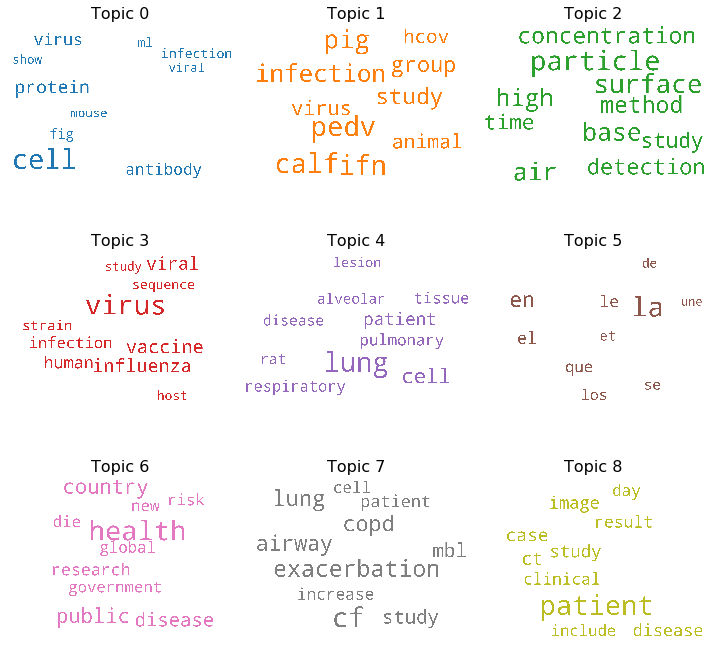

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

<b>4. Distribution of documents based on topics</b>

In [40]:
df

,doc_id,dominant_topic,weight,topic_keywords
0,0,0,0.912894,"patient, infection, study, respiratory, pneumo..."
1,1,12,0.762738,"cell, expression, study, il, response, effect,..."
2,2,10,0.43741,"protein, cov, virus, cell, bind, sars, structu..."
3,3,11,0.425117,"lung, cell, patient, pulmonary, tissue, respir..."
4,4,12,0.381466,"cell, expression, study, il, response, effect,..."
...,...,...,...,...
72214,72214,16,0.397957,"sample, virus, pcr, test, study, positive, det..."
72215,72215,4,0.534901,"patient, ct, case, study, image, disease, resu..."
72216,72216,7,0.669211,"patient, covid, study, health, case, care, dis..."
72217,72217,5,0.998787,"la, en, el, le, que, los, se, et, de, une"


In [41]:
topic_df = df.groupby('dominant_topic').size().to_frame(name='topic_count').reset_index()
topic_df

,dominant_topic,topic_count
0,0,3739
1,1,145
2,2,6529
3,3,2816
4,4,3068
5,5,1269
6,6,6514
7,7,14971
8,8,3319
9,9,2263


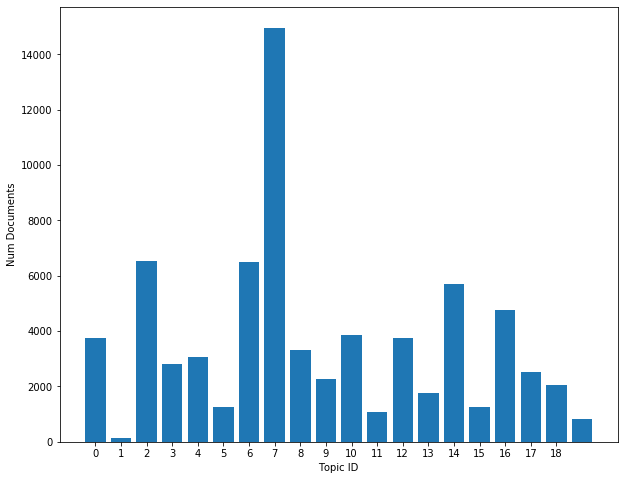

In [42]:
plt.figure(figsize=(10,8))
plt.bar(topic_df['dominant_topic'], topic_df['topic_count'])
plt.xlabel('Topic ID')
plt.ylabel('Num Documents')
plt.xticks(np.arange(topic_df['dominant_topic'].min(),topic_df['dominant_topic'].max(), 1))
plt.show()

<b>5. TSNE Visualization of Document Clusters</b>

In [43]:
from sklearn.manifold import TSNE

In [ ]:
topic_perc_df = pd.DataFrame(index=range(50000),columns=range(20))
for doc_id, topic_vector in enumerate(lda_model[corpus]):
    #print(topic_vector)
    perc_df_row = [p for i, p in topic_vector]
    #print(perc_df_row)
    topic_perc_df.loc[doc_id] = sorted(perc_df_row)[:20]

print('Done Loading Data')
topic_perc_df.dropna(inplace=True)
topic_perc_df = topic_perc_df.astype('float64')
best_topic_ids = topic_perc_df.idxmax(axis=1).tolist()
#print(best_topic_ids)
tsne_model = TSNE(n_components=2, random_state=42, init='pca').fit_transform(topic_perc_df.values)
print("Done TSNE")

plt.figure(figsize=(12,8))
plt.scatter(tsne_model[:,0], tsne_model[:,1],c=best_topic_ids)
plt.show()